Trong phân tích dữ liệu cách dễ nhất và nhanh nhất để đánh giá và khảo sát dữ liệu là dựa vào đồ thị, ta có thể nhìn qua đồ thị và đánh giá được ngay: giá vàng tăng hay giảm, mức độ tăng giảm như thế nào, mức độ tương quan giữa A và B ra sao. Nếu một bản báo cáo dài vài trang sẽ làm khó nhà quản trị thì 1 đồ thị sẽ dễ dàng hơn nhiều để ra quyết định. 

# Basic plots

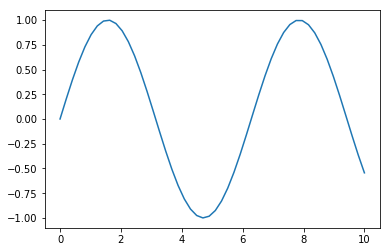

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Vẽ đồ thị 
# tạo ra các giá trị x
x = np.linspace(0, 10, 50)

# Tạo ra sinus = sin(x)
sinus = np.sin(x)

# Vẽ và hiện thị đồ thị
plt.plot(x, sinus)
plt.show()

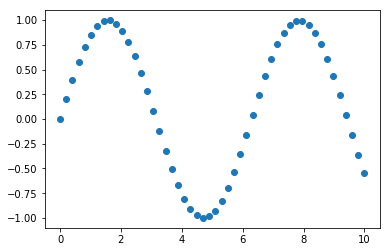

In [27]:
plt.plot(x, sinus, "o")
plt.show()
# use plt.plot to get color / marker abbreviations

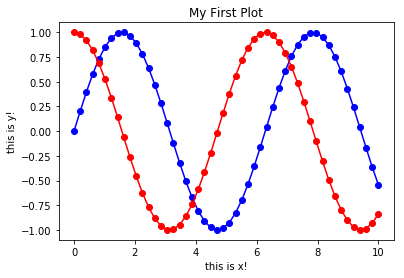

In [3]:
# Rapid multiplot
cosinus = np.cos(x)
plt.plot(x, sinus, "-b", x, sinus, "ob", x, cosinus, "-r", x, cosinus, "or")
plt.xlabel('this is x!')
plt.ylabel('this is y!')
plt.title('My First Plot')
plt.show()

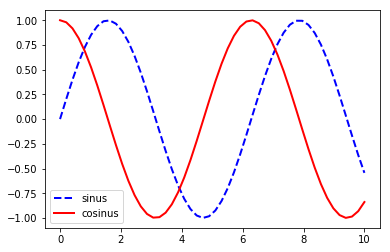

In [4]:
# Step by step
plt.plot(x, sinus, label='sinus', color='blue', linestyle='--', linewidth=2)
plt.plot(x, cosinus, label='cosinus', color='red', linestyle='-', linewidth=2)
plt.legend()
plt.show()

# Scatter (2D) plots

Đồ thị điểm gãy mô tả từng điểm dữ liệu trên mặt phẳng 2 chiều, 
qua đó ta có thể đánh giá nhanh chiều biến thiên và mối quan hệ giữa các biến

In [5]:
import pandas as pd
#try:
#salary = pd.read_csv("../data/salary_table.csv")
#except:
url = 'https://raw.github.com/duchesnay/pylearn-doc/master/data/salary_table.csv'
salary = pd.read_csv(url)
df = salary

### Simple scatter with colors

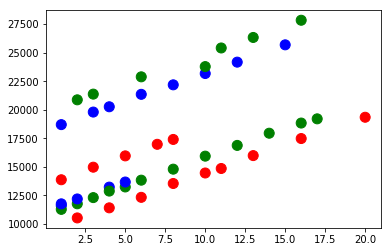

In [21]:
colors = colors_edu = {'Bachelor':'r', 'Master':'g', 'Ph.D':'blue'}
a = plt.scatter(df['experience'], df['salary'], c=df['education'].apply(lambda x: colors[x]), s=100)


### Scatter plot with colors and symbols

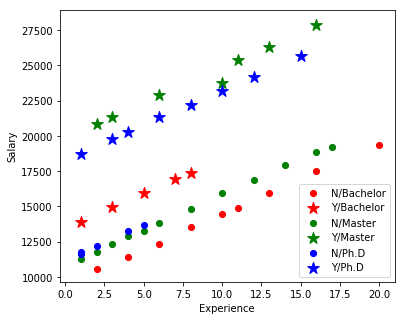

In [7]:
## Figure size
plt.figure(figsize=(6,5))
## Define colors / sumbols manually
symbols_manag = dict(Y='*', N='.')
colors_edu = {'Bachelor':'r', 'Master':'g', 'Ph.D':'blue'}
## group by education x management => 6 groups
for values, d in salary.groupby(['education','management']):
    edu, manager = values
    plt.scatter(d['experience'], d['salary'], marker=symbols_manag[manager], color=colors_edu[edu], s=150, label=manager+"/"+edu)
## Set labels
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.legend(loc=4) # lower right
plt.show()

### Saving Figures

In [22]:
### bitmap format
plt.plot(x, sinus)
plt.savefig("sinus.png")
plt.close()
# Prefer vectorial format (SVG: Scalable Vector Graphics) can be edited with
# Inkscape, Adobe Illustrator, Blender, etc.
plt.plot(x, sinus)

plt.savefig("sinus.svg")
plt.close()
# Or pdf
plt.plot(x, sinus)
plt.savefig("sinus.pdf")
plt.close()

# Exploring data (with seaborn)
### Boxplot

Biểu đồ này hữu ích trong việc mô tả một số vị trí quan trọng của phân phối. Biểu đồ diễn tả 5 vị trí phân bố của dữ liệu, đó là : giá trị nhỏ nhất (min), tứ phân vị thứ nhất (Q1), trung vị (median), tứ phân vị thứ 3 (Q3) và giá trị lớn nhất (max).

Cách vẽ biểu đồ hộp :
     1. Vẽ một trục ngang thể hiện giá trị của dữ liệu
     2. Bên trên trục giá trị, ta vẽ một hình hộp chữ nhật với cạnh trái là tứ phân vị thứ nhất (Q1) và cạnh phải là tứ phân vị thứ ba (Q3).
     3. Kẻ một đường thẳng đứng nối cạnh trên và cạnh dưới của hộp tại trung vị.
     4. Kẻ hai đường râu cho hộp. Tức là ta kẻ một đường ngang từ điểm giữa của cạnh trái hộp đến giá trị nhỏ nhất của hộp mà không phải giá trị ngoại biên (outlier). Tương tự, kẻ một đường ngang từ điểm giữa của cạnh phải hộp đến giá trị lớn nhất của hộp mà không phải giá trị ngoại biên (outlier).


Như vậy, để vẽ một biểu đồ hộp, trước tiên ta phải tính:
        - Trung vị
        - Q1 & Q3
        - Giá trị thấp của biến (L) và giá trị cao của biến (U)

Tóm lượt những công dụng của biểu đồ hộp:
-Sử dụng cho dữ liệu có cỡ mẫu nhỏ
- Có thể mô tả hình dáng của phân bố dựa vào độ dài tương đối của râu và hai phần của hộp: phân bố nghiêng về phía có râu dài hơn và hộp lớn hơn. Tuy nhiên nó không mô tả được khoảng hở (gap) giữa các phân bố dữ liệu hoặc các chóp (moulds) nếu có.
-Có thể chỉ ra các giá trị ngoại biên nghi ngờ.
-Có thể dùng để so sánh giữa các nhóm với nhau. 

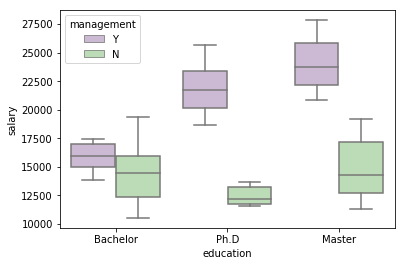

In [24]:
import seaborn as sns
b = sns.boxplot(x="education", y="salary", hue="management", data=salary, palette="PRGn")


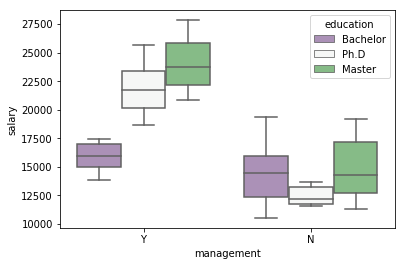

In [25]:
c = sns.boxplot(x="management", y="salary", hue="education", data=salary, palette="PRGn")

# Density plot with one figure containing multiple axis

Đồ thị mật độ. cho ta đánh giá dạng phân phối của biến ngẫu nhiên 

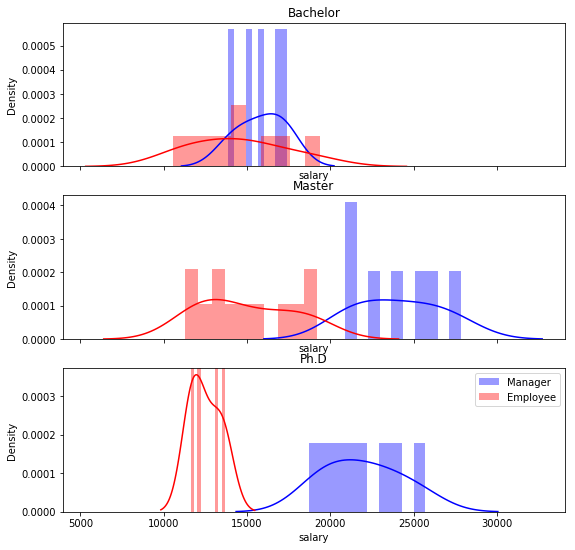

In [14]:
# Set up the matplotlib figure: 3 x 1 axis
f, axes = plt.subplots(3, 1, figsize=(9, 9), sharex=True)
i = 0
for edu, d in salary.groupby(['education']):
    sns.distplot(d.salary[d.management == "Y"], color="b", bins=10, label="Manager", ax=axes[i])
    sns.distplot(d.salary[d.management == "N"], color="r", bins=10, label="Employee", ax=axes[i])
    axes[i].set_title(edu)
    axes[i].set_ylabel('Density')
    i += 1
plt.legend()
plt.show()